In [ ]:
import rasterio
import matplotlib.pyplot as plt   
import numpy as np
import os



img_path = "/home/sl636/TS_data/2018/fire_21458798/2018-01-01.tif"
with rasterio.open(img_path, 'r') as f:
    img = f.read()

labels =        {0: 'M11',
                1: 'I2',
                2: 'I1',
                3: 'NDVI',
                4: 'EVI2',
                5: 'precip',
                6: 'windspeed',
                7: 'winddir',
                8: 'mintemp',
                9: 'maxtemp',
                10: 'ERC',
                11: 'humidity',
                12: 'slope',
                13: 'aspect',
                14: 'elevation',
                15: 'pdsi',
                16: 'Landcover',
                17: 'f_precip',
                18: 'f_windspeed',
                19: 'f_winddir',
                20: 'f_temp',
                21: 'f_humidity',
                22: 'active fire'}
fig, ax = plt.subplots(4,6, figsize=(12, 12))
for i, current_ax in enumerate(ax.flat):
    current_ax.axis('off')
    if i<=22:
        current_ax.imshow(np.nan_to_num(img[i,...],0.0))
        current_ax.set_title(labels[i])
plt.tight_layout()
        


: 

In [9]:
img[22,...].shape

(304, 247)

In [10]:
import torch

predictions_file_name="/home/sl636/WildfireSpreadTS/lightning_logs/predictions_gcmiitbv.pt"

fire_masks_combined = torch.load(predictions_file_name)



In [11]:
# Extract the input fire masks, predicted fire masks, and ground truth fire masks
x_af = fire_masks_combined[0]
y_hat = fire_masks_combined[1]
y = fire_masks_combined[2]

In [50]:
x_af.   

AttributeError: 'Tensor' object has no attribute 'attrs'

In [45]:
from torchmetrics import AveragePrecision

# Initialize the AveragePrecision metric
ap_metric = AveragePrecision(task="binary")

# Update the metric with each sample
num_samples = y_hat.shape[0]
for j in range(num_samples):
    ap_metric.update(y_hat[j].flatten(), y[j].flatten().int())

# Compute the overall average precision
overall_ap_value = ap_metric.compute()
print(f'Overall Average Precision: {overall_ap_value:.4f}')

Overall Average Precision: 0.3703


/home/sl636/miniconda3/envs/geospatial/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AveragePrecision` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


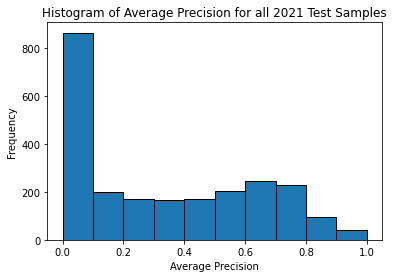

In [12]:
import torch
from torchmetrics import AveragePrecision
import matplotlib.pyplot as plt

# Assume fire_masks_combined is a tensor containing the input, predicted, and ground truth fire masks
# fire_masks_combined.shape should be (3, num_samples, height, width)

# Extract the input fire masks, predicted fire masks, and ground truth fire masks
x_af = fire_masks_combined[0]
y_hat = fire_masks_combined[1]
y = fire_masks_combined[2]

# Initialize a list to store AP values
ap_values = []

# Compute the AP for each sample and store the values
num_samples = y_hat.shape[0]
for j in range(num_samples):
    ap_metric = AveragePrecision(task="binary")
    ap_metric.update(y_hat[j].flatten(), y[j].flatten().int())
    ap_value = ap_metric.compute()
    ap_values.append(ap_value.item())

# Plot a histogram of AP values
plt.hist(ap_values, bins=20, edgecolor='black')
plt.xlabel('Average Precision')
plt.ylabel('Frequency')
plt.title('Histogram of Average Precision for all 2021 Test Samples')
plt.show()


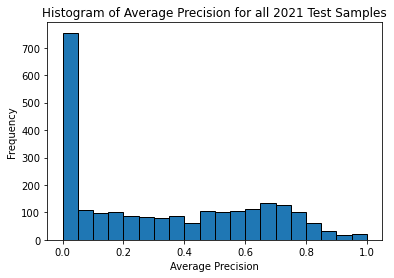

In [15]:
# Plot a histogram of AP values
plt.hist(ap_values, bins=20, edgecolor='black')
plt.xlabel('Average Precision')
plt.ylabel('Frequency')
plt.title('Histogram of Average Precision for all 2021 Test Samples')
plt.show()

In [28]:
import random 
lt_10pc = []
for i in range(x_af.shape[0]):
    if x_af[i].sum() < 1638:
        lt_10pc.append(i)

len(lt_10pc)

plot_lt_10pc = random.sample(lt_10pc, 10)
plot_lt_10pc



[2574, 2460, 3850, 2999, 3594, 414, 533, 2627, 212, 398]

/home/sl636/miniconda3/envs/geospatial/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AveragePrecision` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


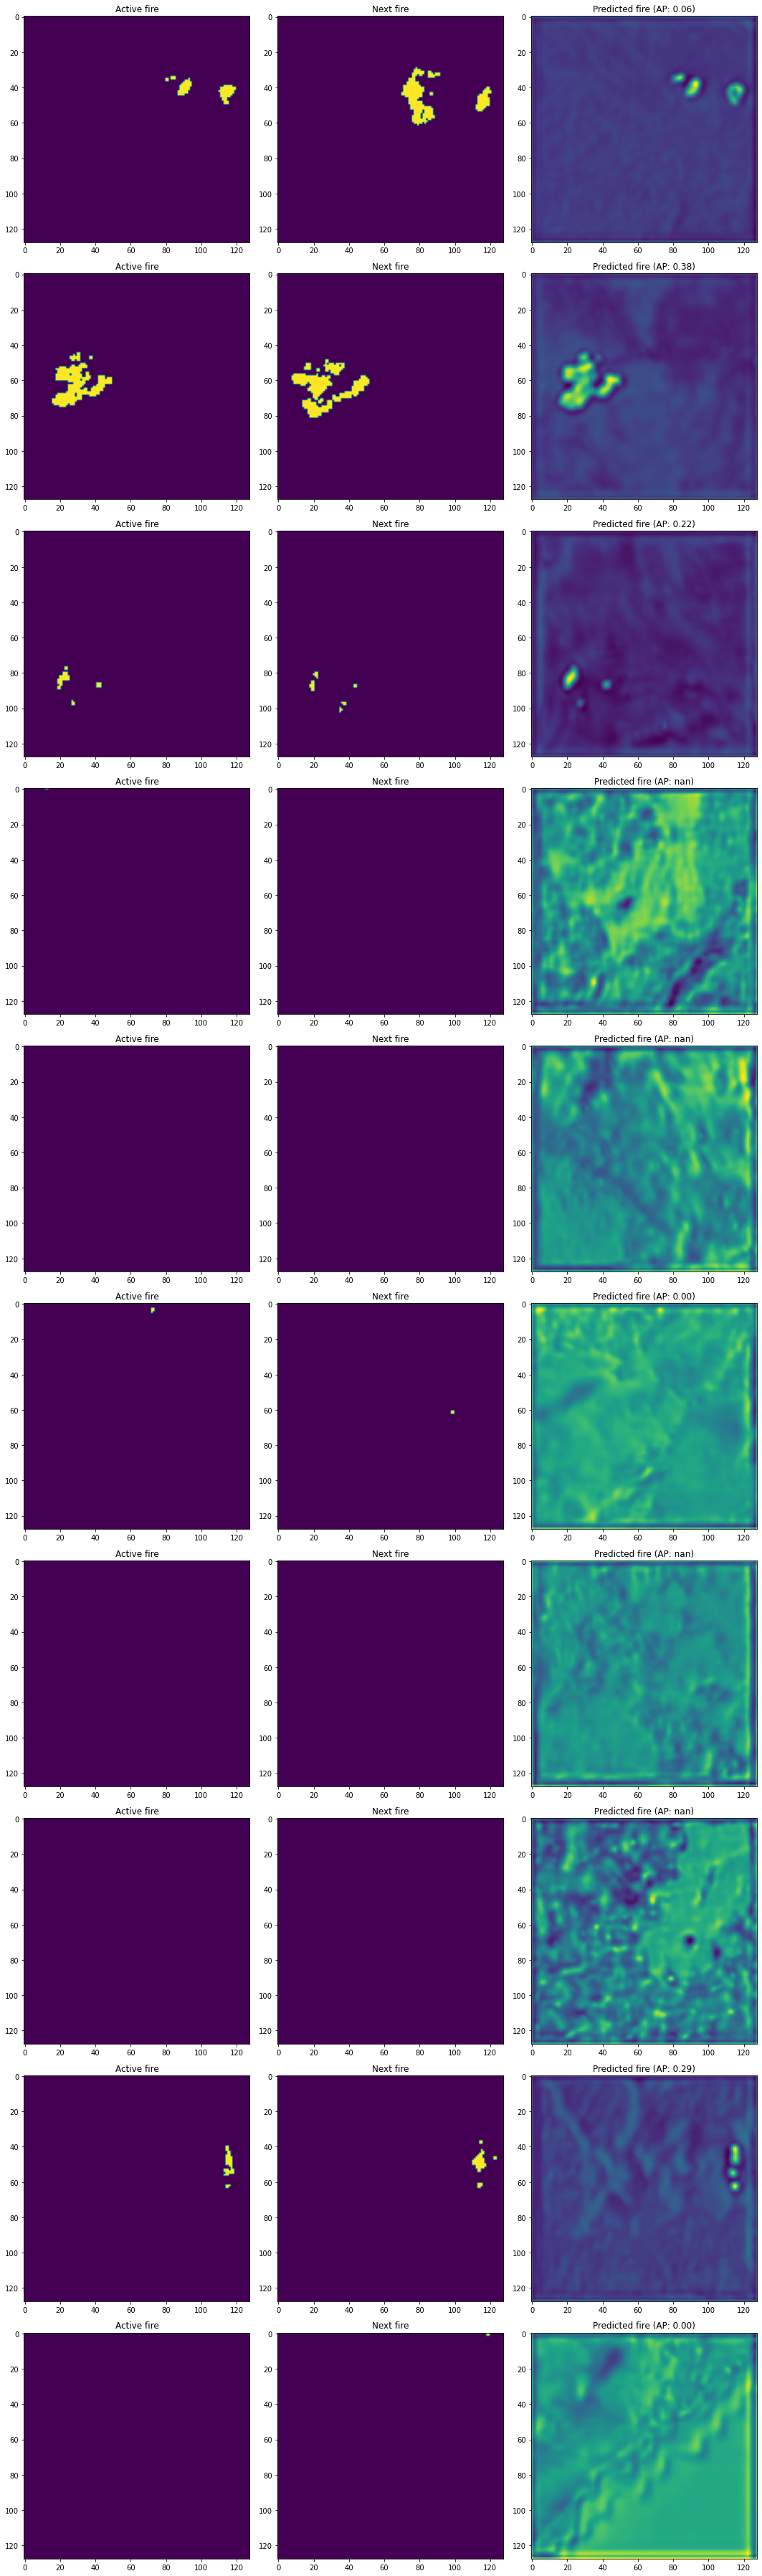

In [29]:
import matplotlib.pyplot as plt
import torch
from torchmetrics import AveragePrecision

# Assume x_af, y, and y_hat are already defined as torch tensors

def apply_threshold(tensor, threshold=0.5):
    """Apply a threshold to convert the tensor to binary values."""
    return (tensor > threshold).float()

# Plotting
fig, axes = plt.subplots(len(plot_lt_10pc), 3, figsize=(15, 5 * len(plot_lt_10pc)))

for i, j in enumerate(plot_lt_10pc):
    axes[i, 0].imshow(x_af[j].cpu().numpy(), cmap="viridis")
    axes[i, 0].set_title("Active fire")
    axes[i, 1].imshow(y[j].cpu().numpy(), cmap="viridis")
    axes[i, 1].set_title("Next fire")
    
    # Apply threshold to the predicted output for binary visualization
    binary_y_hat = apply_threshold(y_hat[j])
    axes[i, 2].imshow(y_hat[j], cmap="viridis")
    
    # Compute the average precision for the current sample
    ap_metric = AveragePrecision(task="binary")
    ap_metric.update(y_hat[j].flatten(), y[j].flatten().int())
    ap_value = ap_metric.compute()
    
    # Set the title with the average precision value
    axes[i, 2].set_title(f"Predicted fire (AP: {ap_value:.2f})")


plt.tight_layout()
plt.show()


In [21]:
non_empty = []
for i in range(x_af.shape[0]):
    if x_af[i].sum() > 3000:
        non_empty.append(i)

non_empty

[1266, 1340, 2177, 2178, 2179, 2692, 3123, 3124, 3125, 3206, 3257]

/home/sl636/miniconda3/envs/geospatial/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AveragePrecision` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


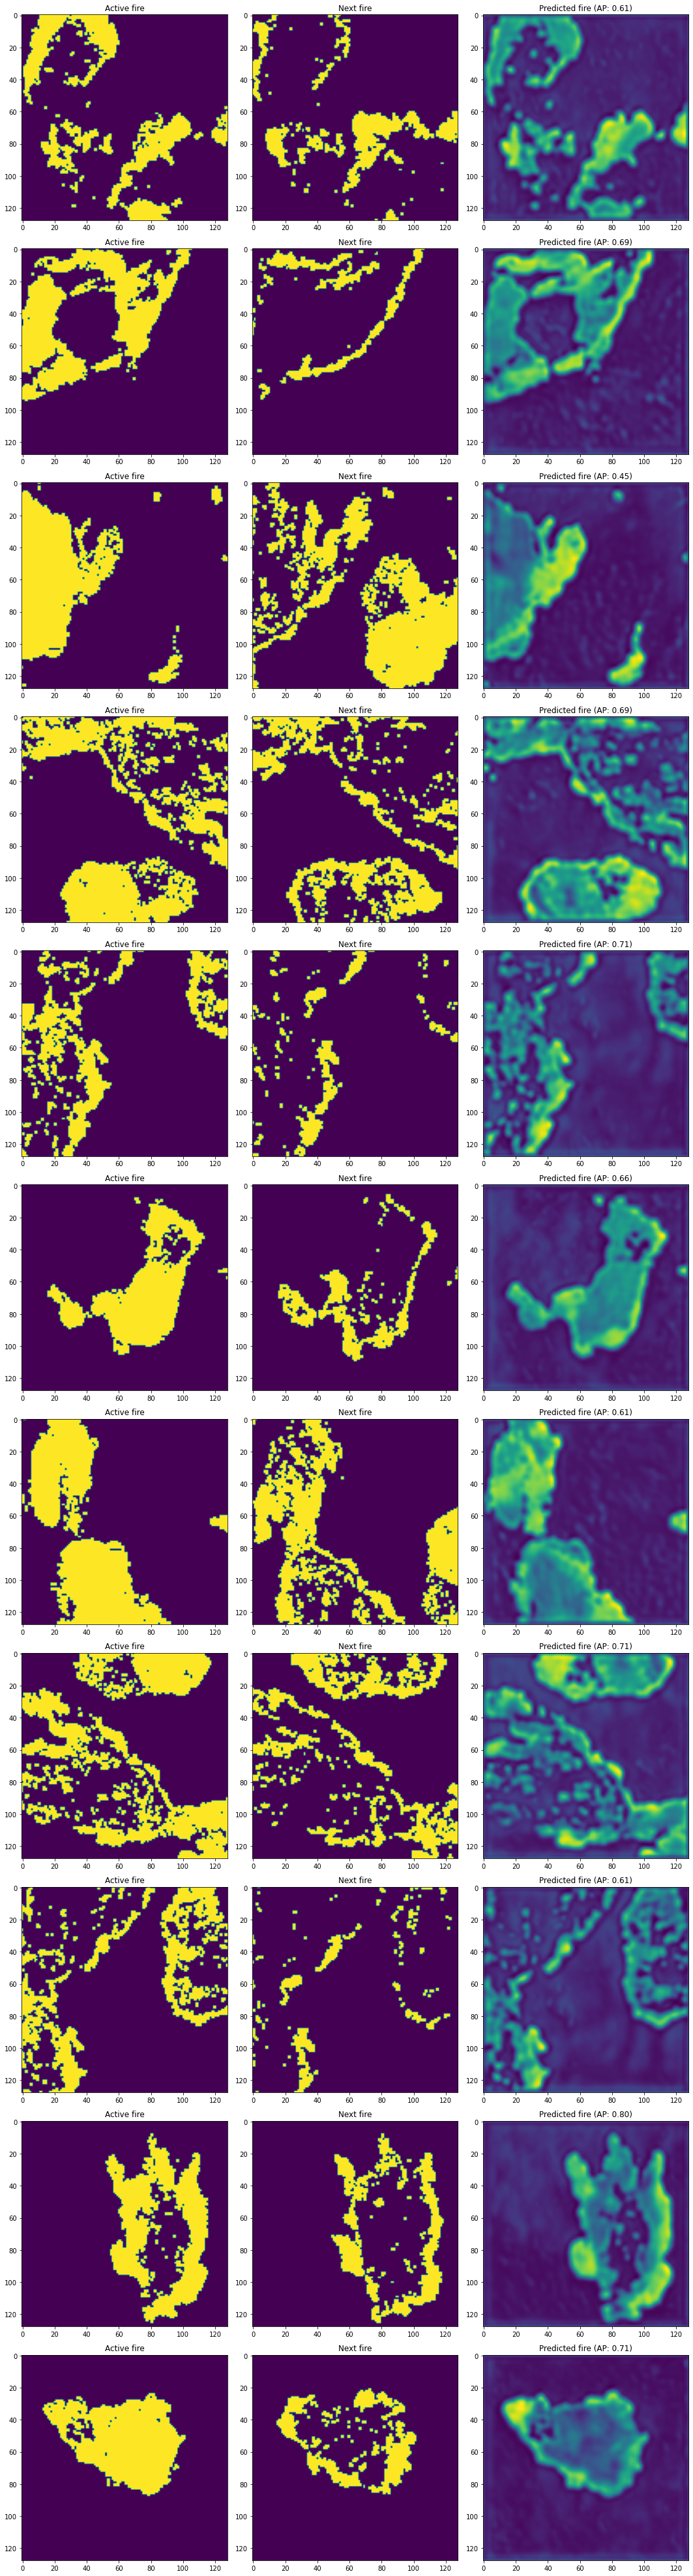

In [43]:
import matplotlib.pyplot as plt
import torch
from torchmetrics import AveragePrecision

# Assume x_af, y, and y_hat are already defined as torch tensors

def apply_threshold(tensor, threshold=0.5):
    """Apply a threshold to convert the tensor to binary values."""
    return (tensor > threshold).float()

# Plotting
fig, axes = plt.subplots(len(non_empty), 3, figsize=(15, 5 * len(non_empty)))

for i, j in enumerate(non_empty):
    axes[i, 0].imshow(x_af[j].cpu().numpy(), cmap="viridis")
    axes[i, 0].set_title("Active fire")
    axes[i, 1].imshow(y[j].cpu().numpy(), cmap="viridis")
    axes[i, 1].set_title("Next fire")
    
    # Apply threshold to the predicted output for binary visualization
    binary_y_hat = apply_threshold(y_hat[j])
    axes[i, 2].imshow(y_hat[j], cmap="viridis")
    
    # Compute the average precision for the current sample
    ap_metric = AveragePrecision(task="binary")
    ap_metric.update(y_hat[j].flatten(), y[j].flatten().int())
    ap_value = ap_metric.compute()
    
    # Set the title with the average precision value
    axes[i, 2].set_title(f"Predicted fire (AP: {ap_value:.2f})")


plt.tight_layout()
plt.show()


In [41]:
import rasterio

# Path to the TIFF file
file_path = "/home/sl636/TS_data/2018/fire_21458798/2018-01-01.tif"

# Open the TIFF file
with rasterio.open(file_path) as src:
    # Get the bounding box of the raster
    bounds = src.bounds
    
    # Print the coordinates of the bounding box
    print("Bounding Box Coordinates:")
    print(f"Left: {bounds.left}, Bottom: {bounds.bottom}")
    print(f"Right: {bounds.right}, Top: {bounds.top}")
    
    # Extract the coordinates of the corners
    top_left = (bounds.left, bounds.top)
    top_right = (bounds.right, bounds.top)
    bottom_left = (bounds.left, bounds.bottom)
    bottom_right = (bounds.right, bounds.bottom)
    
    print("Corners Coordinates:")
    print(f"Top Left: {top_left}")
    print(f"Top Right: {top_right}")
    print(f"Bottom Left: {bottom_left}")
    print(f"Bottom Right: {bottom_right}")


Bounding Box Coordinates:
Left: 697500.0, Bottom: 4022625.0
Right: 790125.0, Top: 4136625.0
Corners Coordinates:
Top Left: (697500.0, 4136625.0)
Top Right: (790125.0, 4136625.0)
Bottom Left: (697500.0, 4022625.0)
Bottom Right: (790125.0, 4022625.0)


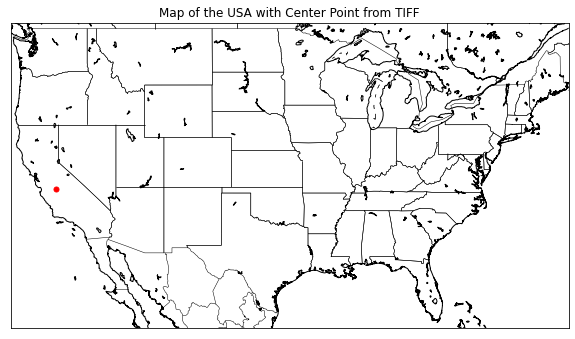

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import rasterio
from pyproj import Transformer

# Path to your TIFF file
file_path = "/home/sl636/TS_data/2018/fire_21458798/2018-01-01.tif"

# Open the TIFF file and extract the bounding box
with rasterio.open(file_path) as src:
    bounds = src.bounds
    src_crs = src.crs  # Get the CRS of the TIFF file

# Check if the source CRS is already EPSG:4326
if src_crs.to_string() != 'EPSG:4326':
    # Initialize a transformer to convert from the source CRS to EPSG:4326 (lat/lon)
    transformer = Transformer.from_crs(src_crs, 'EPSG:4326', always_xy=True)
    center_lon, center_lat = transformer.transform(
        (bounds.left + bounds.right) / 2, (bounds.top + bounds.bottom) / 2)
else:
    # Calculate the center of the bounding box directly
    center_lon = (bounds.left + bounds.right) / 2
    center_lat = (bounds.top + bounds.bottom) / 2

# Create a map of the USA
fig, ax = plt.subplots(figsize=(10, 7))
m = Basemap(
    projection='merc',                  # Mercator projection
    llcrnrlat=24.396308,                # Lower left corner latitude
    urcrnrlat=49.384358,                # Upper right corner latitude
    llcrnrlon=-125.0,                   # Lower left corner longitude
    urcrnrlon=-66.9,                    # Upper right corner longitude
    resolution='i',                     # Intermediate resolution
    ax=ax                               # Plotting on the defined matplotlib axis
)

# Draw coastlines, country boundaries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Convert the center coordinates to map projection coordinates
x, y = m(center_lon, center_lat)

# Plot the center point
m.plot(x, y, 'ro', markersize=5)  # 'ro' stands for red circle

# Add a title and show the plot
plt.title('Map of the USA with Center Point from TIFF')
plt.show()


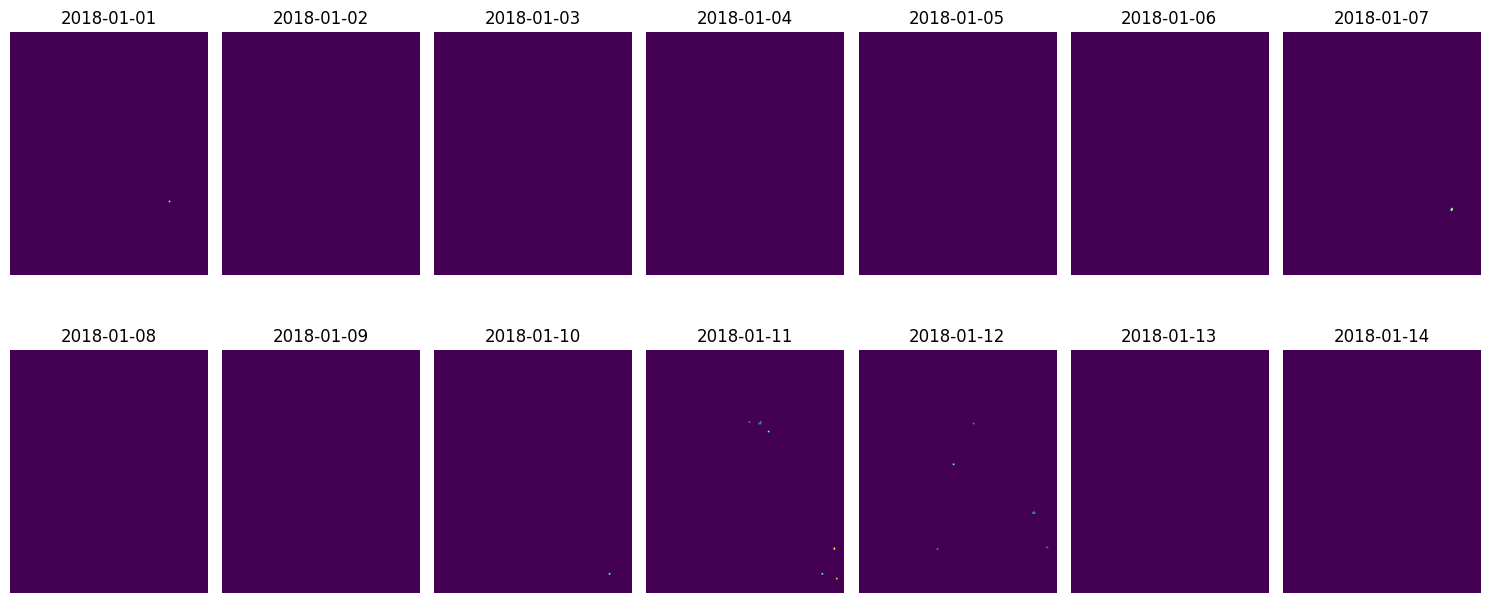

In [3]:
fire_path = "/home/sl636/TS_data/2018/fire_21458798"
fig, ax = plt.subplots(2,7, figsize=(15, 7))

for i, image in enumerate(sorted(os.listdir(fire_path))):
    img_path = os.path.join(fire_path, image)
    with rasterio.open(img_path, 'r') as f:
        img = f.read()
    current_ax = ax.flat[i]
    current_ax.axis('off')
    current_ax.imshow(np.nan_to_num(img[22,...],0.0))
    current_ax.set_title(image.split(".")[0])
plt.tight_layout()
        


In [14]:
fire_path = "/home/sl636/TS_data/2018/fire_21458798"
len(os.listdir(fire_path))

14

In [4]:
def plot_fire(fire_path):
    fire_images = sorted(os.listdir(fire_path))
    num_fires = len(fire_images)
    
    num_cols = min(num_fires, 7)  # Limit columns to a maximum of 7 for better visualization
    num_rows = (num_fires + num_cols - 1) // num_cols  # Calculate the number of rows needed
    fig_width = 2 * num_cols
    fig_height = 2 * num_rows
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

    
    # Flatten the axes array for easy iteration
    if num_rows == 1:
        ax = [ax]
    else:
        ax = ax.flatten()

    for i, image in enumerate(sorted(os.listdir(fire_path))):
        img_path = os.path.join(fire_path, image)
        with rasterio.open(img_path, 'r') as f:
            img = f.read()
        current_ax = ax.flat[i]
        current_ax.axis('off')
        current_ax.imshow(np.nan_to_num(img[22,...],0.0))
        current_ax.set_title(image.split(".")[0], fontsize=10)
    
    
    for j in range(num_fires, len(ax)):
        ax[j].axis('off')
    plt.tight_layout()

    
        


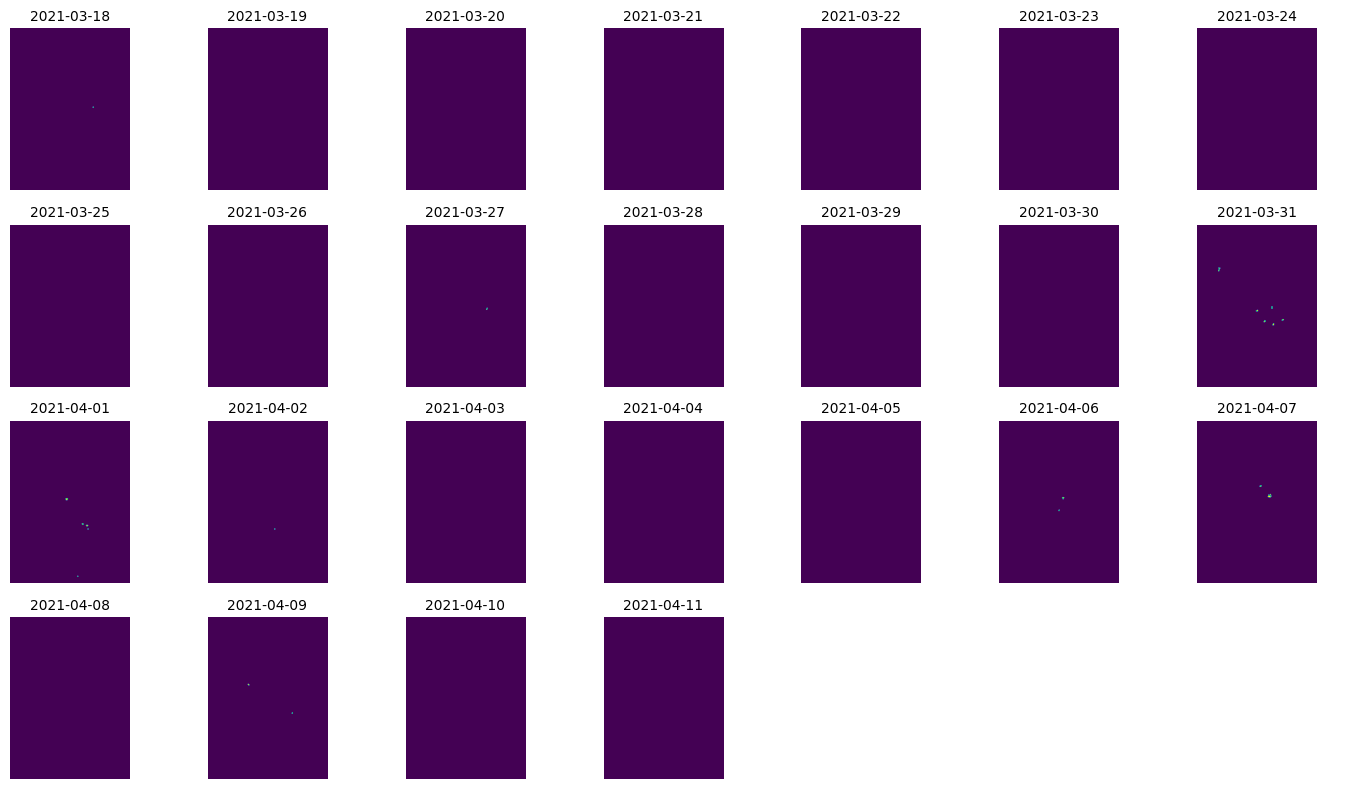

In [5]:
#fire_path = "/home/sl636/TS_data/2021/fire_24935874"
fire_path = "/home/sl636/TS_data/2021/fire_25017323"
plot_fire(fire_path)

In [1]:
import rasterio

img_path = "/home/sl636/TS_data/2018/fire_21458798/2018-01-01.tif"
with rasterio.open(img_path, 'r') as ds:
    lnglat = ds.lnglat()